Epoch 1/50
3/3 - 1s - loss: 0.1102 - val_loss: 0.0551 - 1s/epoch - 414ms/step
Epoch 2/50
3/3 - 0s - loss: 0.0599 - val_loss: 0.0351 - 33ms/epoch - 11ms/step
Epoch 3/50
3/3 - 0s - loss: 0.0374 - val_loss: 0.0456 - 33ms/epoch - 11ms/step
Epoch 4/50
3/3 - 0s - loss: 0.0362 - val_loss: 0.0546 - 32ms/epoch - 11ms/step
Epoch 5/50
3/3 - 0s - loss: 0.0385 - val_loss: 0.0498 - 36ms/epoch - 12ms/step
Epoch 6/50
3/3 - 0s - loss: 0.0348 - val_loss: 0.0418 - 35ms/epoch - 12ms/step
Epoch 7/50
3/3 - 0s - loss: 0.0308 - val_loss: 0.0367 - 36ms/epoch - 12ms/step
Epoch 8/50
3/3 - 0s - loss: 0.0300 - val_loss: 0.0349 - 40ms/epoch - 13ms/step
Epoch 9/50
3/3 - 0s - loss: 0.0304 - val_loss: 0.0342 - 41ms/epoch - 14ms/step
Epoch 10/50
3/3 - 0s - loss: 0.0309 - val_loss: 0.0341 - 37ms/epoch - 12ms/step
Epoch 11/50
3/3 - 0s - loss: 0.0306 - val_loss: 0.0344 - 37ms/epoch - 12ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0297 - val_loss: 0.0352 - 37ms/epoch - 12ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0287 - val_loss: 0.

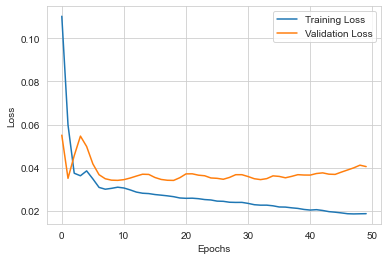

1/1 [==============================] - 0s 225ms/step


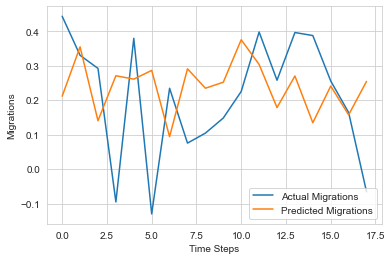

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Generate some example data (replace this with your actual data loading)
# Assume emissions and migrations are 1D arrays of the same length
emissions = np.random.rand(100, 1)
migrations = 0.5 * emissions + 0.1 * np.random.randn(100, 1)

# Normalize the data
scaler = MinMaxScaler()
emissions_scaled = scaler.fit_transform(emissions)
migrations_scaled = scaler.transform(migrations)

# Create sequences for training the RNN
sequence_length = 10  # You can adjust this based on the length of sequences you want
X, y = [], []

for i in range(len(emissions_scaled) - sequence_length):
    X.append(emissions_scaled[i:i+sequence_length])
    y.append(migrations_scaled[i+sequence_length])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=50, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    tf.keras.layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Test Set: {loss}')

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

# Plot actual vs. predicted migrations
plt.plot(scaler.inverse_transform(y_test), label='Actual Migrations')
plt.plot(scaler.inverse_transform(predictions), label='Predicted Migrations')
plt.xlabel('Time Steps')
plt.ylabel('Migrations')
plt.legend()
plt.show()
